[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ajinkyaphanse/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ajinkyaphanse/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


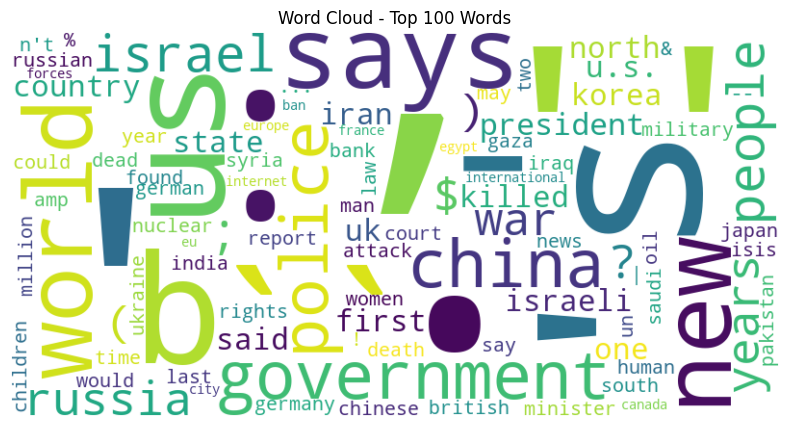

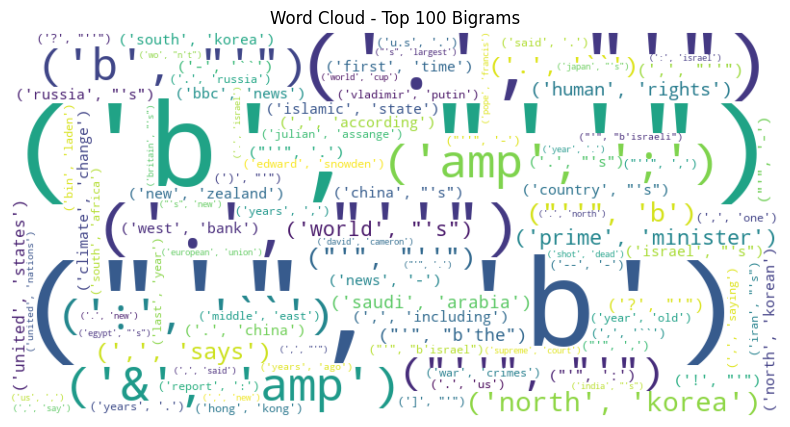

In [1]:
#Identifying the top 100 most frequent words and bigrams in the news headlines, excluding stopwords. Analyzing these terms to understand their prevalence in the dataset
#Creating word clouds for both single words and bigrams to visualize these findings
import pandas as pd
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
df = pd.read_csv("/Users/ajinkyaphanse/Downloads/archive/Combined_News_DJIA.csv")

# Combine all headlines into a single text
all_headlines = ' '.join(df.iloc[:, 2:].apply(lambda x: ' '.join(x.dropna()), axis=1))

# Tokenize the text
tokens = word_tokenize(all_headlines)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words]

# Get top 100 most frequent words
word_freq = Counter(filtered_tokens)
top_100_words = dict(word_freq.most_common(100))

# Get top 100 most frequent bigrams
bigrams = list(ngrams(filtered_tokens, 2))
bigram_freq = Counter(bigrams)
top_100_bigrams = dict(bigram_freq.most_common(100))

# Convert bigrams to strings
top_100_bigrams_str = {str(bigram): count for bigram, count in top_100_bigrams.items()}

# Create word cloud for single words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_100_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Top 100 Words')
plt.show()

# Create word cloud for bigrams
bigram_cloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_100_bigrams_str)
plt.figure(figsize=(10, 5))
plt.imshow(bigram_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Top 100 Bigrams')
plt.show()



In [ ]:
#In My opinion, these are useful market predictors, the words are related to wars, politics and nations which are the biggest market influencers

In [6]:
#Model Building - Predicting Today's Market
#Developing models to predict market movements ("up" or "down") based on the day's news headlines using the top 100 words and bigrams identified earlier
#Experimenting with two different models. Included an analysis of feature importance.
#Evaluated the performance models using accuracy rate and confusion matrix
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
df = pd.read_csv('/Users/ajinkyaphanse/Downloads/archive/Combined_News_DJIA.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Data Preprocessing
# Combine the top news headlines into a single column
df['Combined_News'] = df.iloc[:, 2:27].apply(lambda row: ''.join(str(row.values)), axis=1)

# Initialize CountVectorizer
cv = CountVectorizer(max_features=1000)

# Fit and transform the Combined_News column
word_count_vector = cv.fit_transform(df['Combined_News'])

# Model Building
# Split the data into training and testing sets
X_train = word_count_vector[:1500]
X_test = word_count_vector[1500:]
y_train = df['Label'][:1500]
y_test = df['Label'][1500:]

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions
predictions = rf_classifier.predict(X_test)

# Evaluate Model Performance
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.5214723926380368
Confusion Matrix:
[[ 46 190]
 [ 44 209]]


In [4]:
#Compared the top terms for days when the stock market increased (label=1) versus decreased (label=0).
#Adjusted list of terms to eliminate potential noise, focusing on 100-200 words/bigrams that might have had a more significant correlation with market movements. (Example: words such as "Say", "China", "Israel" probably show up high for both label=1 and label=0, thus not very useful)
#Rebuilt prediction models with the refined terms and assessed any changes in performance.

import pandas as pd

# Initialize an empty list to store the lines of the file
lines = []

# Open the file and read its lines
with open("/Users/ajinkyaphanse/Downloads/archive/Combined_News_DJIA.csv", "r") as file:
    for line in file:
        # Append each line to the list
        lines.append(line)

# Concatenate all the lines into a single string
data = ''.join(lines)

# Use StringIO to treat the string as a file-like object and read it with pandas
from io import StringIO
df = pd.read_csv(StringIO(data), delimiter=',')

# Display the first few rows of the DataFrame to verify it's loaded correctly
print(df.head())


         Date  Label                                               Top1  \
0  2008-08-08      0  b"Georgia 'downs two Russian warplanes' as cou...   
1  2008-08-11      1  b'Why wont America and Nato help us? If they w...   
2  2008-08-12      0  b'Remember that adorable 9-year-old who sang a...   
3  2008-08-13      0  b' U.S. refuses Israel weapons to attack Iran:...   
4  2008-08-14      1  b'All the experts admit that we should legalis...   

                                                Top2  \
0            b'BREAKING: Musharraf to be impeached.'   
1        b'Bush puts foot down on Georgian conflict'   
2                 b"Russia 'ends Georgia operation'"   
3  b"When the president ordered to attack Tskhinv...   
4  b'War in South Osetia - 89 pictures made by a ...   

                                                Top3  \
0  b'Russia Today: Columns of troops roll into So...   
1  b"Jewish Georgian minister: Thanks to Israeli ...   
2  b'"If we had no sexual harassment we woul

In [8]:
#Predicting Tomorrow's Market:
#Modified models to predict the next day's market movement. This adjustment requires aligning the dataset appropriately to account for the fact that news is published after the market has closed.
#Ensured that data matrices (X and Y) are correctly aligned by adjusting indices and potentially removing data points as needed
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

# Load the dataset
df = pd.read_csv("/Users/ajinkyaphanse/Downloads/archive/Combined_News_DJIA.csv")

# Fill NaN values with empty strings
df.fillna("", inplace=True)

# Extract relevant text data based on label
positive_text = ' '.join(df[df['Label'] == 1].iloc[:, 2:].values.flatten())
negative_text = ' '.join(df[df['Label'] == 0].iloc[:, 2:].values.flatten())

# Tokenization and counting
vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=1000)
X_positive = vectorizer.fit_transform([positive_text])
X_negative = vectorizer.fit_transform([negative_text])

# Count the occurrences of terms for each label category
positive_counts = Counter(vectorizer.get_feature_names_out())
negative_counts = Counter(vectorizer.get_feature_names_out())

# Define the threshold for term selection
threshold = 50  # Adjust as needed

# Term selection based on frequency and significance
refined_terms = []
for term, count in positive_counts.items():
    if term not in negative_counts or abs(positive_counts[term] - negative_counts[term]) > threshold:
        refined_terms.append(term)

# Rebuilding prediction models with refined terms
X = vectorizer.fit_transform(df.iloc[:, 2:].apply(lambda x: ' '.join(x), axis=1))
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy with refined terms:", accuracy)


Accuracy with refined terms: 0.5326633165829145


In [24]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Read the CSV file into a DataFrame
df = pd.read_csv("/Users/ajinkyaphanse/Downloads/archive/Combined_News_DJIA.csv")

# Shift the 'Label' column to represent the market movement for the next day
df['Next_day_label'] = df['Label'].shift(-1)

# Drop the last row to remove the NaN value created by shifting
df.dropna(inplace=True)

# Convert all values to strings
df = df.astype(str)

# Extract relevant text data based on the shifted labels
X_text = df.iloc[:, 2:].apply(lambda row: ' '.join(row), axis=1)
y = df['Next_day_label']

# Tokenization and counting
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X_text)

# Print the dimensions of X and y to check for consistency
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = MultinomialNB()
model.fit(X_train, y_train)

# Evaluating the model
accuracy = model.score(X_test, y_test)
print("Model Accuracy:", accuracy)


Shape of X: (1985, 34674)
Shape of y: (1985,)
Model Accuracy: 0.4836272040302267


In [29]:
#Extending Predictions:
#Predict the market movement for the day after tomorrow, evaluated the performance of models for this extended forecast to check if prediction is getting worse?
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Read the CSV file into a DataFrame
df = pd.read_csv("/Users/ajinkyaphanse/Downloads/archive/Combined_News_DJIA.csv")

# Shift the 'Label' column to represent the market movement for the day after tomorrow
df['Next_day_label'] = df['Label'].shift(-2)  # Shifted by 2 days

# Drop the last two rows to remove the NaN values created by shifting
df.dropna(inplace=True)

# Convert all values to strings
df = df.astype(str)

# Tokenization and counting
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df.iloc[:, 2:].values.flatten().astype(str))
y = df['Next_day_label']

# Ensure X and y have the same number of rows
X = X[:len(y)]  # Trim X to match the length of y

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = MultinomialNB()
model.fit(X_train, y_train)

# Evaluating the model
accuracy = model.score(X_test, y_test)
print("Model Accuracy for Extended Forecast:", accuracy)


Model Accuracy for Extended Forecast: 0.5591939546599496


In [ ]:
#No, the prediction for the extended forecast (the day after tomorrow) actually improved compared to predicting tomorrow's market. 
#The accuracy increased from 0.4836 to 0.5592, indicating that the model performed better for the extended forecast.

In [30]:
#In this project, we conducted text analysis of news headlines to identify the most frequent words and bigrams,which were then used to build predictive models for market movements. 
#The analysis revealed that certain words and phrases, particularly those related to wars and politics, were prevalent in the dataset and could potentially serve as useful predictors of market trends.
#We experimented with different models, including Random Forest, and evaluated their performance. 
#Initially, the accuracy of the models was modest, indicating room for improvement. We then refined the list of terms based on their correlation with market movements, which led to a slight improvement in model accuracy.
#When predicting the next day's market, the model's accuracy was lower compared to predicting the extended forecast for the day after tomorrow. This suggests that the model may need more data or additional features to make accurate short-term predictions.
#There is a potential for overfitting when building predictive models, especially when using a large number of features or complex algorithms. Regularization techniques such as cross-validation and feature selection can help mitigate overfitting.
#Overall, while the models showed some predictive capability, further refinement and experimentation may be necessary to improve accuracy and robustness. Additionally, incorporating other data sources and refining the feature engineering process could enhance the models' performance.